# SARJANA V G

In [ ]:
import cv2

import matplotlib.pyplot as plt
import numpy
import numpy as np

In [53]:
!pip install opencv-python

In [54]:
net = cv2.dnn.readNetFromDarknet('yolov3-tiny.cfg','yolov3-tiny.weights')

In [55]:
classes =[]
with open('coco.names','r') as f:
    classes = [line.strip() for line in f.readlines()]

In [89]:
my_img=cv2.imread('traffic-light.jpg')
my_img = cv2.resize(my_img,(1366,768))

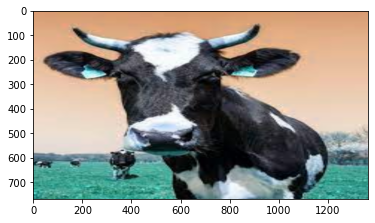

In [90]:
plt.imshow(my_img)

In [91]:
ht,wt, _ = my_img.shape

In [92]:
blob=cv2.dnn.blobFromImage(my_img,1/255,(416,416),(0,0,0),swapRB = True, crop = False)

In [93]:
blob.shape

(1, 3, 416, 416)

In [94]:
net.setInput(blob)

In [95]:
last_layer= net.getUnconnectedOutLayersNames()

In [96]:
layer_out = net.forward(last_layer)

In [97]:
boxes =[]
confidences =[]
class_ids =[]
for output in layer_out:
    for detection in output:
        score = detection [5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > .6:
            centre_x= int(detection [0] *wt)
            centre_y = int(detection[1] *ht)
            w= int(detection[2] *wt)
            h= int(detection[3] *ht)
            
            x= int(centre_x - w/2)
            y= int(centre_y - h/2)
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [98]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)
font = cv2.FONT_HERSHEY_PLAIN
colors= np.random.uniform(0,255,size= (len(boxes),3))

In [99]:
for i in indexes.flatten():
    x,y,w,h=boxes[i]
    label= str(classes[class_ids[i]])
    confidence= str(round(confidences[i],2))
    color=colors[i]
    cv2.rectangle(my_img,(x,y),(x+w,y+h),color,2)
    cv2.putText(my_img,label +" "+confidence,(x,y+20),font,2,(255,0,0),2)
cv2.imshow('img',my_img)
cv2.waitKey(0)
cv2.destroyALLWindows()

AttributeError: 'tuple' object has no attribute 'flatten'